# Smoking classification
* ID : index
* gender
* age : 5-years gap
* height(cm)
* weight(kg)
* waist(cm) : Длинна окружности талии 
* eyesight(left) - зренние правого глаза 
* eyesight(right) - зренние левого глаза
* hearing(left) - слух левого уха
* hearing(right) - слух правого уха
* systolic : Blood pressure - кровяное давление 
* relaxation : Blood pressure - давление в спокойствие 
* fasting blood sugar - уровень сахара в крови на тощак
* Cholesterol : total - холестерин всего
* triglyceride - 
* HDL : cholesterol type
* LDL : cholesterol type
* hemoglobin - гемоглобин
* Urine protein - белок мочи 
* serum creatinine - креатин в сыворотке крови 
* AST : glutamic oxaloacetic transaminase type
* ALT : glutamic oxaloacetic transaminase type
* Gtp : γ-GTP
* oral : Oral Examination status
* dental caries - зубной кариес 
* tartar : tartar status
* smoking : 0 or 1

In [166]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import fisher_exact

## EDA

In [167]:
df = pd.read_csv('smoking_train.csv')
df.head()

ID gender   age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   2      M  55.0         170        60.0       80.0             0.8   
1   3      M  40.0         165        70.0       88.0             1.5   
2   4      F  40.0         155        60.0       86.0             1.0   
3   5      M  30.0         180        75.0       85.0             1.2   
4   6      M  40.0         160        60.0       85.5             1.0   

   eyesight(right)  hearing(left)  hearing(right)  ...  hemoglobin  \
0              0.8            1.0             1.0  ...        15.8   
1              1.5            1.0             1.0  ...        14.7   
2              1.0            1.0             1.0  ...        12.5   
3              1.2            1.0             1.0  ...        16.2   
4              1.0            1.0             1.0  ...        17.0   

   Urine protein  serum creatinine   AST   ALT   Gtp  oral  dental caries  \
0            1.0               1.0  21.0  16.0  22.0     Y              0   
1            1.0               1.0  19.0  26.0  18.0     Y              0   
2            1.0               0.6  16.0  14.0  22.0     Y              0   
3            1.0               1.2  18.0  27.0  33.0     Y              0   
4            1.0               0.7  21.0  27.0  39.0     Y              1   

   tartar  smoking  
0       N      yes  
1       Y       no  
2       N       no  
3       Y       no  
4       Y      yes  

[5 rows x 27 columns]

In [168]:
df.shape

(44554, 27)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44554 entries, 0 to 44553
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   44554 non-null  int64  
 1   gender               44554 non-null  object 
 2   age                  44114 non-null  float64
 3   height(cm)           44554 non-null  int64  
 4   weight(kg)           44510 non-null  float64
 5   waist(cm)            44554 non-null  float64
 6   eyesight(left)       44554 non-null  float64
 7   eyesight(right)      44554 non-null  float64
 8   hearing(left)        44554 non-null  float64
 9   hearing(right)       44554 non-null  float64
 10  systolic             44554 non-null  float64
 11  relaxation           44554 non-null  float64
 12  fasting blood sugar  44554 non-null  float64
 13  Cholesterol          44554 non-null  float64
 14  triglyceride         44554 non-null  float64
 15  HDL                  44554 non-null 

In [170]:
print("Переменнная : Количество пропусков")
for i in df.columns:
    if (df[i].isna().any()):
        print(f'{i} : {df[i].isna().sum()}')

Переменнная : Количество пропусков
age : 440
weight(kg) : 44


## Работа с категориальными переменными

In [171]:
df.head()

ID gender   age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   2      M  55.0         170        60.0       80.0             0.8   
1   3      M  40.0         165        70.0       88.0             1.5   
2   4      F  40.0         155        60.0       86.0             1.0   
3   5      M  30.0         180        75.0       85.0             1.2   
4   6      M  40.0         160        60.0       85.5             1.0   

   eyesight(right)  hearing(left)  hearing(right)  ...  hemoglobin  \
0              0.8            1.0             1.0  ...        15.8   
1              1.5            1.0             1.0  ...        14.7   
2              1.0            1.0             1.0  ...        12.5   
3              1.2            1.0             1.0  ...        16.2   
4              1.0            1.0             1.0  ...        17.0   

   Urine protein  serum creatinine   AST   ALT   Gtp  oral  dental caries  \
0            1.0               1.0  21.0  16.0  22.0     Y              0   
1            1.0               1.0  19.0  26.0  18.0     Y              0   
2            1.0               0.6  16.0  14.0  22.0     Y              0   
3            1.0               1.2  18.0  27.0  33.0     Y              0   
4            1.0               0.7  21.0  27.0  39.0     Y              1   

   tartar  smoking  
0       N      yes  
1       Y       no  
2       N       no  
3       Y       no  
4       Y      yes  

[5 rows x 27 columns]

In [172]:
df['gender'].value_counts()

M    28372
F    16182
Name: gender, dtype: int64

In [173]:
df['gender'] = [0 if (i == 'F') else 1 for i in df['gender']]
df['gender'].value_counts()

1    28372
0    16182
Name: gender, dtype: int64

In [174]:
df['oral'] = [0 if (i == 'Y') else 1 for i in df['oral']]
df['oral'].head()

0    0
1    0
2    0
3    0
4    0
Name: oral, dtype: int64

In [175]:
df['tartar'].value_counts()

Y    24785
N    19769
Name: tartar, dtype: int64

In [176]:
df['tartar'] = [0 if (i == 'Y') else 1 for i in df['tartar']]
df['smoking'].value_counts()

no     28170
yes    16384
Name: smoking, dtype: int64

In [177]:
df['smoking'] = [0 if (i == 'no') else 1 for i in df['smoking']]
df['smoking'].value_counts()

0    28170
1    16384
Name: smoking, dtype: int64

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44554 entries, 0 to 44553
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   44554 non-null  int64  
 1   gender               44554 non-null  int64  
 2   age                  44114 non-null  float64
 3   height(cm)           44554 non-null  int64  
 4   weight(kg)           44510 non-null  float64
 5   waist(cm)            44554 non-null  float64
 6   eyesight(left)       44554 non-null  float64
 7   eyesight(right)      44554 non-null  float64
 8   hearing(left)        44554 non-null  float64
 9   hearing(right)       44554 non-null  float64
 10  systolic             44554 non-null  float64
 11  relaxation           44554 non-null  float64
 12  fasting blood sugar  44554 non-null  float64
 13  Cholesterol          44554 non-null  float64
 14  triglyceride         44554 non-null  float64
 15  HDL                  44554 non-null 

## EDA

<Axes: ylabel='gender'>

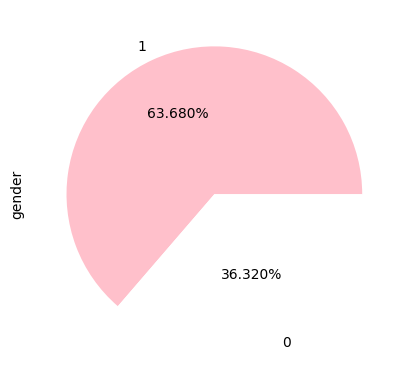

In [179]:
df['gender'].value_counts().plot.pie(autopct='%1.3f%%', colors=['pink', 'white'])

<Axes: ylabel='smoking'>

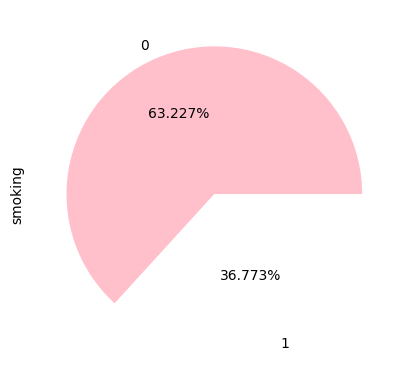

In [180]:
df['smoking'].value_counts().plot.pie(autopct='%1.3f%%', colors=['pink', 'white'])

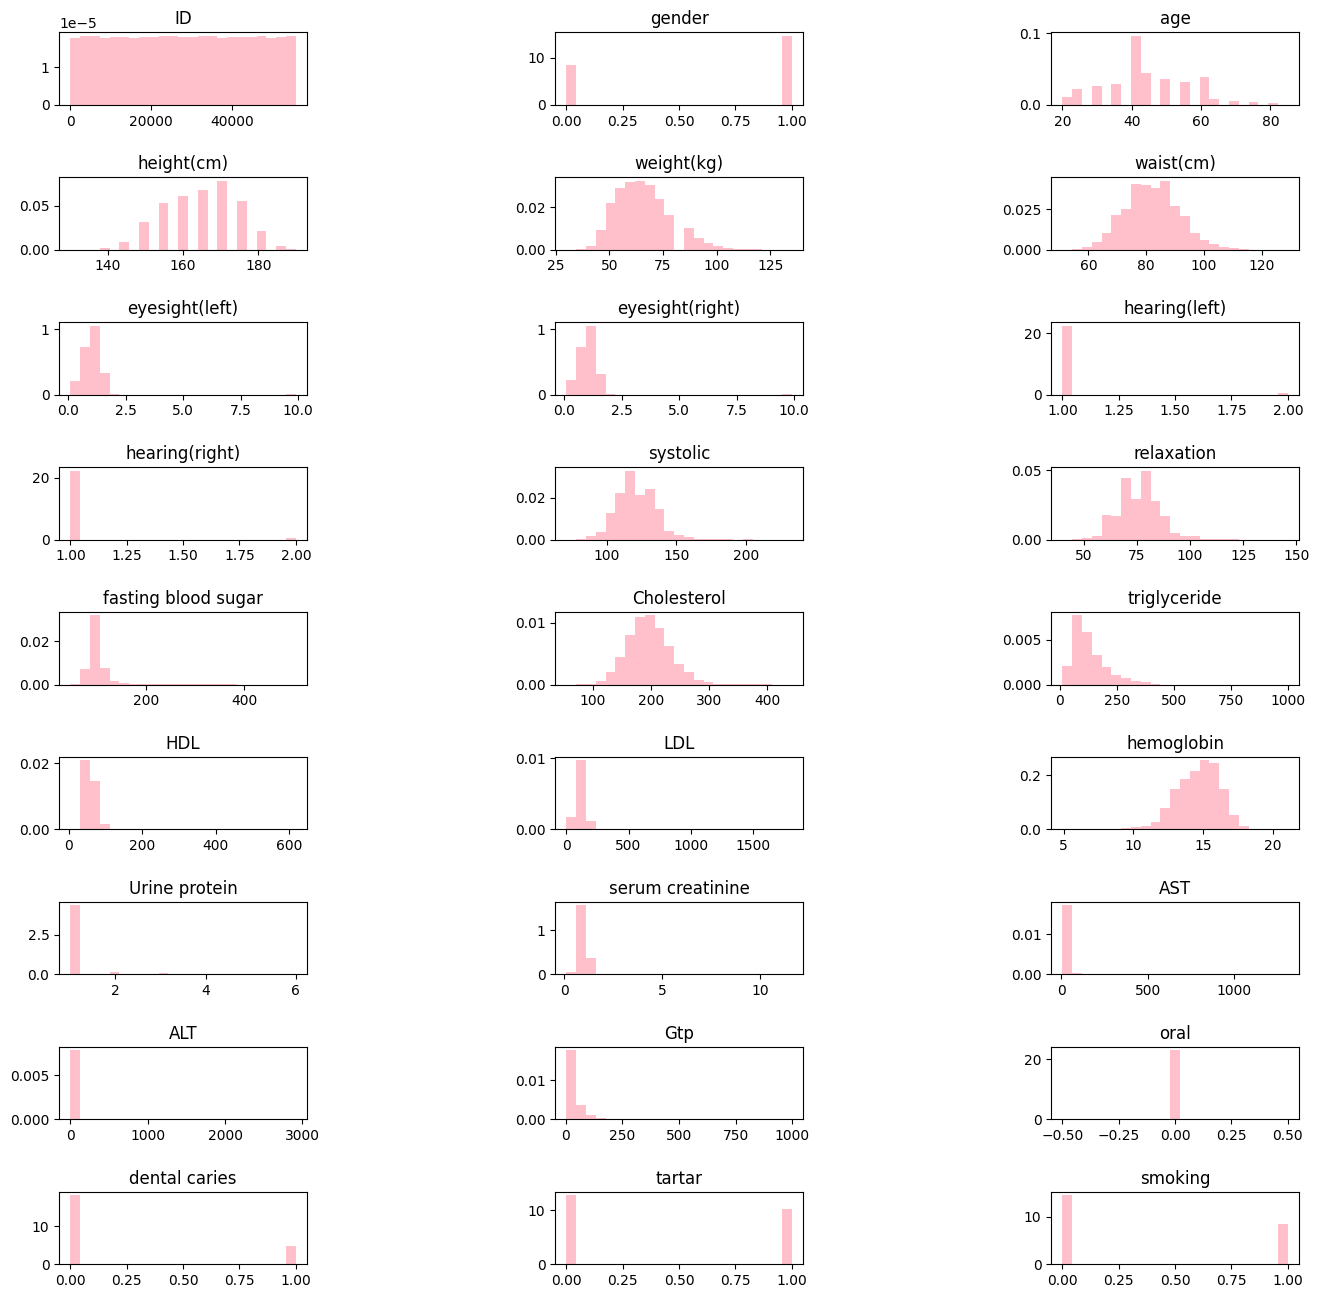

In [181]:
keys = list(df.columns)

fig, axs = plt.subplots(nrows=9, ncols=3, figsize=(16, 16))
fig.subplots_adjust(hspace=1, wspace=1)
for i, col in enumerate(df.columns):
    key = col
    row, col = divmod(i, 3)
    axs[row, col].hist(df[key], density=True, bins=23, color='pink')
    axs[row, col].set_title(key)

plt.show()

## Outliers

In [182]:
Q1 = df['height(cm)'].quantile(0.25)
Q3 = df['height(cm)'].quantile(0.75)

Q1, Q3

(160.0, 170.0)

In [183]:
df[df['height(cm)'] < Q1].shape[0], df[df['height(cm)'] > Q3].shape[0]

(10905, 9539)

In [184]:
df['height(cm)'].mean(), df['height(cm)'].mode()[0]

(164.65143421466087, 170)

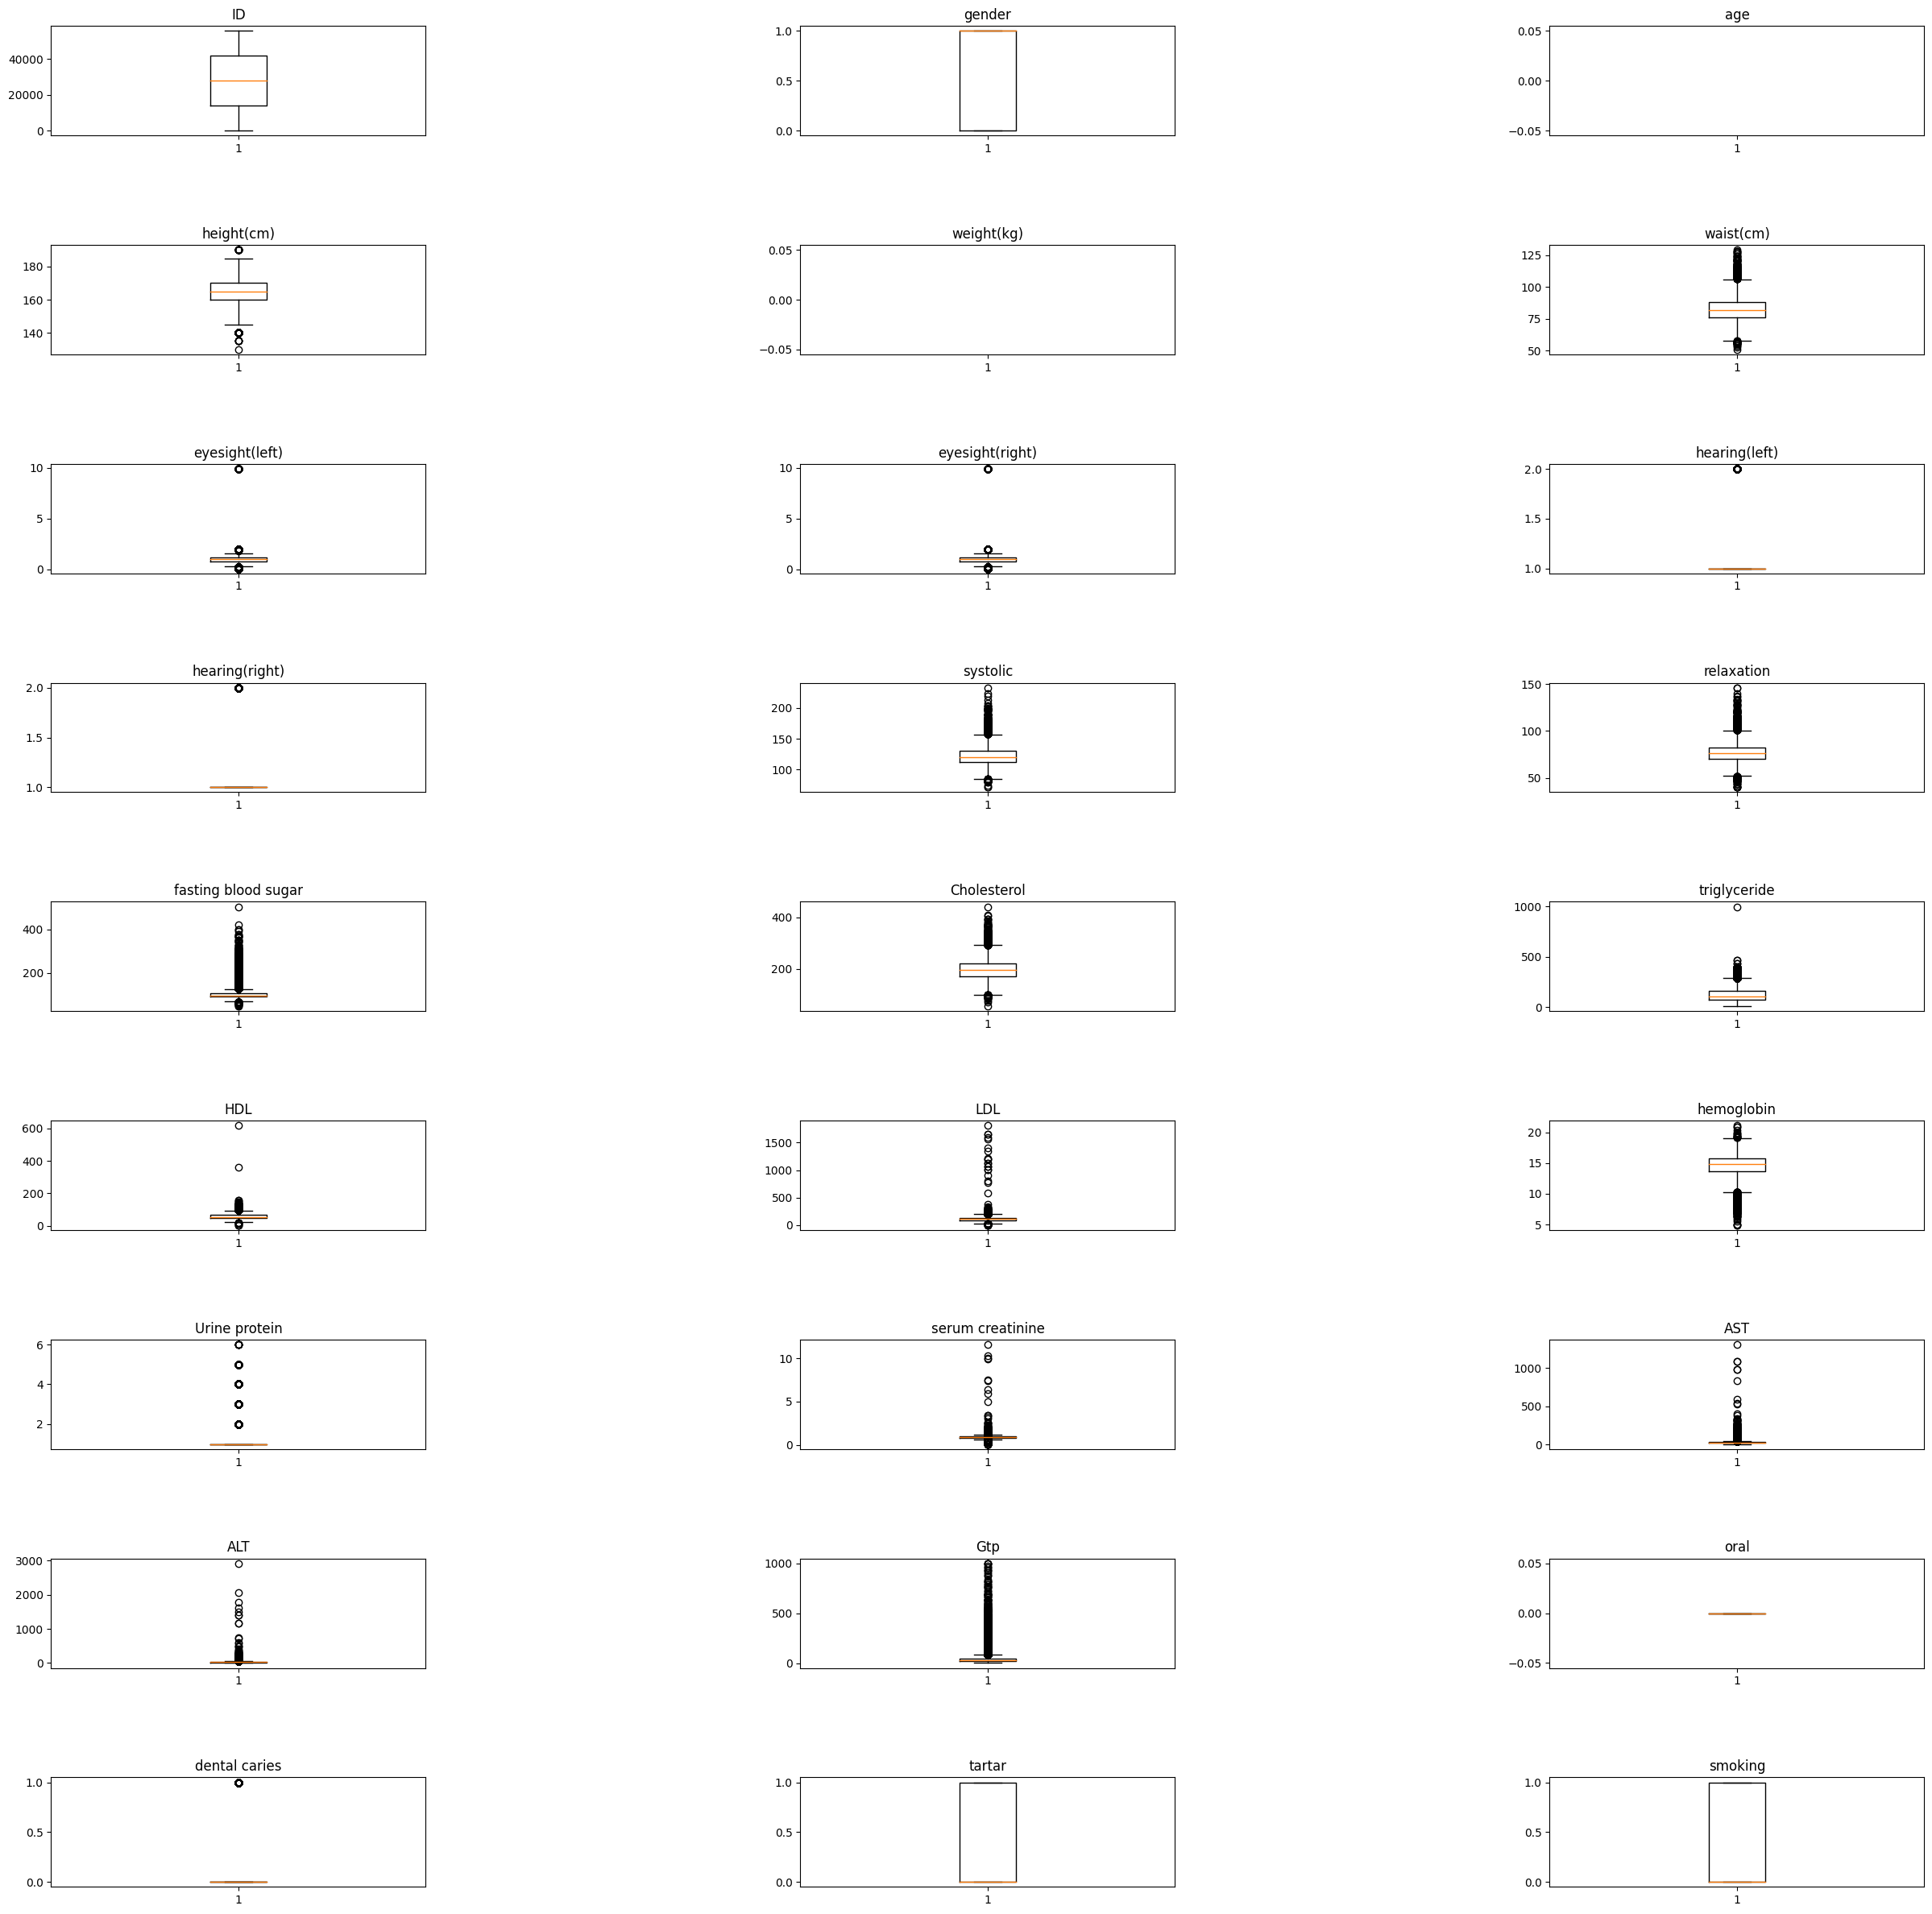

In [185]:
keys = df.columns
fig, axs = plt.subplots(nrows=9, ncols=3, figsize=(30, 30))
fig.subplots_adjust(hspace=1, wspace=1)
for i, col in enumerate(df.columns):
    key = col
    row, col = divmod(i, 3)
    axs[row, col].boxplot(df[key])
    axs[row, col].set_title(key)

plt.show()

## Работа с пропусками 

In [186]:
df.isna().any()

ID                     False
gender                 False
age                     True
height(cm)             False
weight(kg)              True
waist(cm)              False
eyesight(left)         False
eyesight(right)        False
hearing(left)          False
hearing(right)         False
systolic               False
relaxation             False
fasting blood sugar    False
Cholesterol            False
triglyceride           False
HDL                    False
LDL                    False
hemoglobin             False
Urine protein          False
serum creatinine       False
AST                    False
ALT                    False
Gtp                    False
oral                   False
dental caries          False
tartar                 False
smoking                False
dtype: bool

In [187]:
df['age'] = df['age'].fillna(df['age'].mean())

In [188]:
df['weight(kg)'] = df['weight(kg)'].fillna(df['weight(kg)'].mean())

In [189]:
df.isna().any()

ID                     False
gender                 False
age                    False
height(cm)             False
weight(kg)             False
waist(cm)              False
eyesight(left)         False
eyesight(right)        False
hearing(left)          False
hearing(right)         False
systolic               False
relaxation             False
fasting blood sugar    False
Cholesterol            False
triglyceride           False
HDL                    False
LDL                    False
hemoglobin             False
Urine protein          False
serum creatinine       False
AST                    False
ALT                    False
Gtp                    False
oral                   False
dental caries          False
tartar                 False
smoking                False
dtype: bool

## StandardScaler

In [190]:
from sklearn.preprocessing import StandardScaler

In [191]:
x = df.drop(['smoking'], axis=1)
y = df[['smoking']]

In [192]:
scaler = StandardScaler()

In [193]:
std = StandardScaler()

X_std = std.fit_transform(x)

X_std = pd.DataFrame(X_std, columns=x.columns)
X_std

ID    gender       age  height(cm)  weight(kg)  waist(cm)  \
0     -1.734547  0.755216  0.898022    0.580744   -0.458239  -0.220828   
1     -1.734485  0.755216 -0.349103    0.037847    0.321671   0.641678   
2     -1.734423 -1.324125 -0.349103   -1.047946   -0.458239   0.426052   
3     -1.734360  0.755216 -1.180520    1.666537    0.711626   0.318238   
4     -1.734298  0.755216 -0.349103   -0.505049   -0.458239   0.372145   
...         ...       ...       ...         ...         ...        ...   
44549  1.730093 -1.324125  1.313730   -1.590842   -1.238149  -0.759894   
44550  1.730591 -1.324125  0.066605   -0.505049   -1.238149  -1.298960   
44551  1.730715 -1.324125  0.898022   -0.505049   -1.238149  -1.460680   
44552  1.730778  0.755216  1.313730    0.037847   -0.458239  -0.436454   
44553  1.731213  0.755216  0.898022   -0.505049   -0.068284   0.318238   

       eyesight(left)  eyesight(right)  hearing(left)  hearing(right)  ...  \
0           -0.440215        -0.423733       -0.16386       -0.164653  ...   
1            1.013009         0.998673       -0.16386       -0.164653  ...   
2           -0.025008        -0.017331       -0.16386       -0.164653  ...   
3            0.390199         0.389071       -0.16386       -0.164653  ...   
4           -0.025008        -0.017331       -0.16386       -0.164653  ...   
...               ...              ...            ...             ...  ...   
44549       -0.025008         0.389071       -0.16386       -0.164653  ...   
44550        0.390199         0.389071       -0.16386       -0.164653  ...   
44551       -0.025008         0.389071       -0.16386       -0.164653  ...   
44552       -0.440215        -0.017331       -0.16386       -0.164653  ...   
44553       -0.232612        -0.626933       -0.16386       -0.164653  ...   

            LDL  hemoglobin  Urine protein  serum creatinine       AST  \
0      0.874419    0.752820      -0.215708          0.514185 -0.269763   
1      2.692977    0.048630      -0.215708          0.514185 -0.373693   
2     -0.192468   -1.359750      -0.215708         -1.292804 -0.529587   
3      0.340976    1.008889      -0.215708          1.417680 -0.425657   
4      1.019904    1.521028      -0.215708         -0.841057 -0.269763   
...         ...         ...            ...               ...       ...   
44549  0.025759   -1.295733      -0.215708         -0.389309 -0.009938   
44550 -0.871396   -0.399491      -0.215708          0.062438 -0.321728   
44551 -1.259355   -1.423768      -0.215708         -1.744552 -0.477622   
44552  0.753182   -0.143422      -0.215708         -0.841057 -0.321728   
44553  0.850172    0.240682      -0.215708         -0.389309 -0.009938   

            ALT       Gtp  oral  dental caries    tartar  
0     -0.341084 -0.355909   0.0      -0.520517  1.119701  
1     -0.034033 -0.434923   0.0      -0.520517 -0.893095  
2     -0.402494 -0.355909   0.0      -0.520517  1.119701  
3     -0.003328 -0.138619   0.0      -0.520517 -0.893095  
4     -0.003328 -0.020098   0.0       1.921167 -0.893095  
...         ...       ...   ...            ...       ...  
44549 -0.187559 -0.513938   0.0      -0.520517 -0.893095  
44550 -0.463905 -0.513938   0.0      -0.520517 -0.893095  
44551 -0.494610 -0.553445   0.0      -0.520517  1.119701  
44552 -0.248969 -0.434923   0.0      -0.520517  1.119701  
44553  0.058082  0.019410   0.0      -0.520517 -0.893095  

[44554 rows x 26 columns]

## Logistic Regression

In [194]:

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [195]:
x_train, x_test, y_train, y_test = train_test_split(X_std,y, test_size=0.2, stratify=y, random_state=2)

In [196]:
model = LogisticRegression()

In [197]:
model.fit(x_train,np.array(y_train).ravel())

LogisticRegression()

In [198]:
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
training_data_accuracy

0.7469068260247453

In [199]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
test_data_accuracy

0.7427898103467624

In [200]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, x_test_prediction)
cnf_matrix

array([[4354, 1280],
       [1012, 2265]], dtype=int64)